**Whats app Chat Analysis**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install emoji

     |████████████████████████████████| 175 kB 5.2 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=8b4599f652d1ed61a256f75affc26c83a609ae988426273cb04ec0afa38d7542
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [3]:
pip install heatmapz

**Import required libraries**

In [4]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
import datetime as dt
from matplotlib.ticker import MaxNLocator
import regex
import emoji
from seaborn import *
from heatmap import heatmap
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
from nltk import *
from plotly import express as px

to extract Date from chat file 

In [5]:
def startsWithDateAndTime(s):
       pattern = '^([0-9]+)(/)([0-9]+)(/)([0-9][0-9]), ([0-9]+):([0-9][0-9]) (AM|PM) -'
       result = re.match(pattern, s)
       if result:
          return True
       return False

In [6]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    
    return date, time, message

In [7]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
### Uploading exported chat file
conversationPath = "/content/drive/MyDrive/WhatsApp Chat with Data Science : Bagcampus.txt" # chat file
with open(conversationPath, encoding="utf-8") as fp:
    ### Skipping first line of the file because contains information related to something about end-to-end encryption
    fp.readline() 
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
          messageBuffer.append(line)
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Message']) # Initialising a pandas Dataframe.
### changing datatype of "Date" column.
df["Date"] = pd.to_datetime(df["Date"])

newborn dataset

In [8]:
df

,Date,Time,Message
0,2021-10-04,5:44 PM,"Bagcampus created group ""Data Science : Bagcam..."
1,2021-10-05,12:07 PM,You joined using this group's invite link
2,2021-10-05,3:53 PM,Amey: https://youtu.be/eN_3d4JrL_w
3,2021-10-05,3:53 PM,Amey: Today's meeting is at 5:00 pm. Link : ht...
4,2021-10-05,4:57 PM,Bagcampus: Join
...,...,...,...
148,2021-11-30,2:50 PM,Ria: Yes Sir Done 👍
149,2021-11-30,3:17 PM,Poonam Wagh: 🙌🏻🤟
150,2021-11-30,6:59 PM,Krishabh Sir: Make Sure You Import Emoji Use ...
151,2021-11-30,6:59 PM,Krishabh Sir: !pip i emoji or !pip install emoji


seperate author name and message

In [9]:
authornames = []
msgs = []
for i in df['Message']:
  a = re.split('([\w\W]+?):\s', i) # pattern match to first {user_name}: pattern and spliting it aka each msg from a user
  if(a[1:]): # user typed messages
    authornames.append(a[1])
    msgs.append(a[2])
  else: # other notifications in the group
    authornames.append("group_notification")
    msgs.append(a[0])

In [10]:
df['Author'] = authornames
df['message'] = msgs

In [11]:
 df.drop('Message', axis=1, inplace=True)

In [12]:
df

,Date,Time,Author,message
0,2021-10-04,5:44 PM,"Bagcampus created group ""Data Science","Bagcampus"""
1,2021-10-05,12:07 PM,group_notification,You joined using this group's invite link
2,2021-10-05,3:53 PM,Amey,https://youtu.be/eN_3d4JrL_w
3,2021-10-05,3:53 PM,Amey,
4,2021-10-05,4:57 PM,Bagcampus,Join
...,...,...,...,...
148,2021-11-30,2:50 PM,Ria,Yes Sir Done 👍
149,2021-11-30,3:17 PM,Poonam Wagh,🙌🏻🤟
150,2021-11-30,6:59 PM,Krishabh Sir,Make Sure You Import Emoji Use command pip i ...
151,2021-11-30,6:59 PM,Krishabh Sir,!pip i emoji or !pip install emoji


basic information of dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     153 non-null    datetime64[ns]
 1   Time     153 non-null    object        
 2   Author   153 non-null    object        
 3   message  153 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 4.9+ KB


 shape of dataset

In [14]:
df.shape

(153, 4)

no. of null values in dataset

In [15]:
df.isnull().sum()

Date       0
Time       0
Author     0
message    0
dtype: int64

Droping Nan values from dataset


In [16]:
df = df.dropna()
df = df.reset_index(drop=True)
df.shape

(153, 4)

no. of authors of group

In [17]:
df['Author'].nunique()

9

authors of group

In [18]:
df['Author'].unique()

array(['Bagcampus created group "Data Science ', 'group_notification',
       'Amey', 'Bagcampus', 'Rasika Mahure', 'Krishabh Sir',
       'Poonam Wagh', 'Rajat', 'Ria'], dtype=object)

In [19]:
weeks = {
0 : 'Monday',
1 : 'Tuesday',
2 : 'Wednesday',
3 : 'Thrusday',
4 : 'Friday',
5 : 'Saturday',
6 : 'Sunday'
}
df['Day'] = df['Date'].dt.weekday.map(weeks)
### Rearranging the columns for better understanding
df = df[['Date','Day','Time','Author','message']]
### Changing the datatype of column "Day".
df['Day'] = df['Day'].astype('category')
### Looking newborn dataset.
df.head()
### Counting number of letters in each message
df["Letter's"] = df['message'].apply(lambda s : len(s))
### Counting number of word's in each message
df["Word's"] = df['message'].apply(lambda s : len(s.split(' ')))
### Function to count number of links in dataset, it will add extra column and store information in it.
URLPATTERN = r'(https?://\S+)'
df['Url_Count'] = df.message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.Url_Count)
### Function to count number of media in chat.
MEDIAPATTERN = r'<Media omitted>'
df['Media_Count'] = df.message.apply(lambda x : re.findall(MEDIAPATTERN, x)).str.len()
media = np.sum(df.Media_Count)
### Looking updated dataset
df

,Date,Day,Time,Author,message,Letter's,Word's,Url_Count,Media_Count
0,2021-10-04,Monday,5:44 PM,"Bagcampus created group ""Data Science","Bagcampus""",10,1,0,0
1,2021-10-05,Tuesday,12:07 PM,group_notification,You joined using this group's invite link,41,7,0,0
2,2021-10-05,Tuesday,3:53 PM,Amey,https://youtu.be/eN_3d4JrL_w,28,1,1,0
3,2021-10-05,Tuesday,3:53 PM,Amey,,0,1,0,0
4,2021-10-05,Tuesday,4:57 PM,Bagcampus,Join,4,1,0,0
...,...,...,...,...,...,...,...,...,...
148,2021-11-30,Tuesday,2:50 PM,Ria,Yes Sir Done 👍,14,4,0,0
149,2021-11-30,Tuesday,3:17 PM,Poonam Wagh,🙌🏻🤟,3,1,0,0
150,2021-11-30,Tuesday,6:59 PM,Krishabh Sir,Make Sure You Import Emoji Use command pip i ...,51,11,0,0
151,2021-11-30,Tuesday,6:59 PM,Krishabh Sir,!pip i emoji or !pip install emoji,34,7,0,0


Extracting basic statistics from the dataset 

In [20]:
total_messages = df.shape[0]
media_messages = df[df['message'] == '<Media omitted>'].shape[0]
links = np.sum(df.Url_Count)
print('Group Chatting Stats : ')
print('Total Number of Messages : {}'.format(total_messages))
print('Total Number of Media Messages : {}'.format(media_messages))
print('Total Number of Links : {}'.format(links))

Group Chatting Stats : 
Total Number of Messages : 153
Total Number of Media Messages : 3
Total Number of Links : 14


Extracting basic statistics of each user 

In [21]:
l = df.Author.unique()
for i in range(len(l)):
  ### Filtering out messages of particular user
  req_df = df[df["Author"] == l[i]]
  ### req_df will contain messages of only one particular user
  print(f'--> Stats of {l[i]} <-- ')
  ### shape will print number of rows which indirectly means the number of messages
  print('Total Message Sent : ', req_df.shape[0])
  ### Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df["Word's"]))/req_df.shape[0]
  w_p_m = ("%.3f" % round(words_per_message, 2))  
  print('Average Words per Message : ', w_p_m)
  ### media conists of media messages
  media = sum(req_df["Media_Count"])
  print('Total Media Message Sent : ', media)
  ### links consist of total links
  links = sum(req_df["Url_Count"])   
  print('Total Links Sent : ', links)   
  print()

--> Stats of Bagcampus created group "Data Science  <-- 
Total Message Sent :  1
Average Words per Message :  1.000
Total Media Message Sent :  0
Total Links Sent :  0

--> Stats of group_notification <-- 
Total Message Sent :  6
Average Words per Message :  8.330
Total Media Message Sent :  0
Total Links Sent :  0

--> Stats of Amey <-- 
Total Message Sent :  44
Average Words per Message :  8.230
Total Media Message Sent :  1
Total Links Sent :  11

--> Stats of Bagcampus <-- 
Total Message Sent :  39
Average Words per Message :  7.820
Total Media Message Sent :  0
Total Links Sent :  3

--> Stats of Rasika Mahure <-- 
Total Message Sent :  26
Average Words per Message :  5.310
Total Media Message Sent :  0
Total Links Sent :  0

--> Stats of Krishabh Sir <-- 
Total Message Sent :  4
Average Words per Message :  7.500
Total Media Message Sent :  0
Total Links Sent :  0

--> Stats of Poonam Wagh <-- 
Total Message Sent :  17
Average Words per Message :  2.650
Total Media Message Sent :

word cloud of most used words in chat

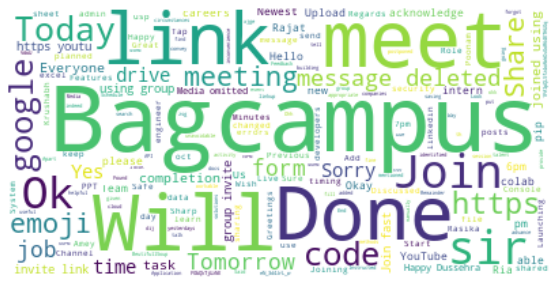

In [22]:
### Word Cloud of mostly used word in our Group
text = " ".join(review for review in df.message)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
  ### Display the generated image:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

total no. of messages sent by each user

In [23]:
### Creates a list of unique Authors
l = df.Author.unique()
for i in range(len(l)):
  ### Filtering out messages of particular user
  req_df = df[df["Author"] == l[i]]
  ### req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

Bagcampus created group "Data Science    ->   1
group_notification   ->   6
Amey   ->   44
Bagcampus   ->   39
Rasika Mahure   ->   26
Krishabh Sir   ->   4
Poonam Wagh   ->   17
Rajat   ->   12
Ria   ->   4


total messages sent on each day of the week 

In [24]:
l = df.Day.unique()
for i in range(len(l)):
  ### Filtering out messages of particular user
  req_df = df[df["Day"] == l[i]]
  ### req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

Monday   ->   9
Tuesday   ->   55
Wednesday   ->   42
Thrusday   ->   15
Friday   ->   17
Saturday   ->   14
Sunday   ->   1


mostly active author of the group

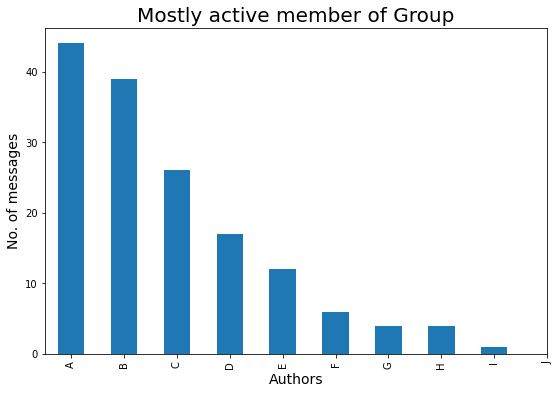

In [25]:
### Mostly Active Author in the Group
plt.figure(figsize=(9,6))
mostly_active = df['Author'].value_counts()
### Top 10 peoples that are mostly active in our Group is : 
m_a = mostly_active.head(10)
bars = ['A','B','C','D','E','F','G','H','I','J']
x_pos = np.arange(len(bars))
m_a.plot.bar()
plt.xlabel('Authors',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Mostly active member of Group',fontdict={'fontsize': 20,'fontweight': 8})
plt.xticks(x_pos, bars)
plt.show()

mostly active day in a week

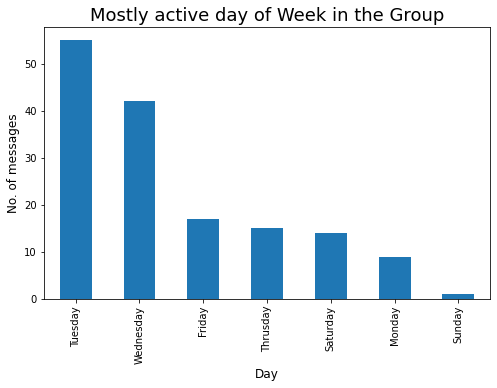

In [26]:
### Mostly Active day in the Group
plt.figure(figsize=(8,5))
active_day = df['Day'].value_counts()
### Top 10 peoples that are mostly active in our Group is : 
a_d = active_day.head(10)
a_d.plot.bar()
plt.xlabel('Day',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Mostly active day of Week in the Group',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

who are used most words

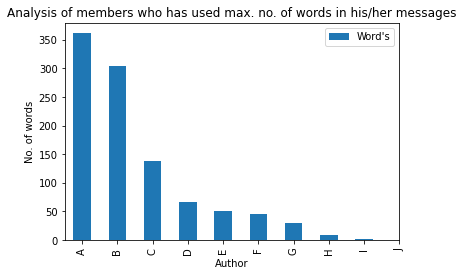

In [27]:
max_words = df[['Author',"Word's"]].groupby('Author').sum()
m_w = max_words.sort_values("Word's",ascending=False).head(10)
bars = ['A','B','C','D','E','F','G','H','I','J']
x_pos = np.arange(len(bars))
m_w.plot.bar(rot=90)
plt.xlabel('Author')
plt.ylabel('No. of words')
plt.title('Analysis of members who has used max. no. of words in his/her messages')
plt.xticks(x_pos, bars)
plt.show()

time whenever the group was highly active

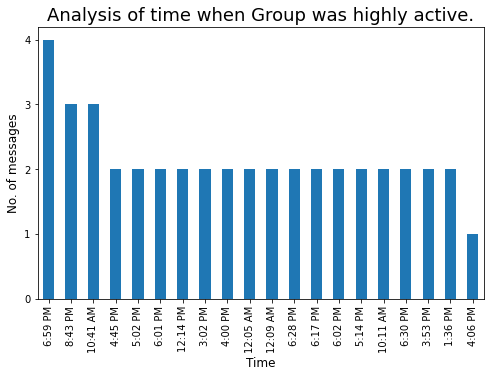

In [28]:
### Time whenever our group is highly active
plt.figure(figsize=(8,5))
t = df['Time'].value_counts().head(20)
tx = t.plot.bar()
tx.yaxis.set_major_locator(MaxNLocator(integer=True))  #Converting y axis data to integer
plt.xlabel('Time',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Analysis of time when Group was highly active.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

date on which our group was highly active

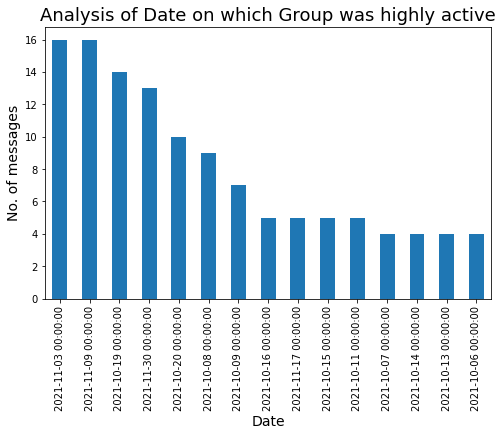

In [29]:
plt.figure(figsize=(8,5))
df['Date'].value_counts().head(15).plot.bar()
plt.xlabel('Date',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of Date on which Group was highly active',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

***Thank You..!***